In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%matplotlib notebook

In [9]:
def stepforward(z,zpower):
    
    zalive = z.copy()
    uza = np.roll(zalive, 1, 0) #neighbour above
    dza = np.roll(zalive, -1, 0) #neighbour below
    rza = np.roll(zalive, -1, 1) #neighbour on right
    lza = np.roll(zalive, 1, 1) #neighbour on left
    
    up = np.roll(zpower, 1, 0) #neighbour above
    dp = np.roll(zpower, -1, 0) #neighbour below
    rp = np.roll(zpower, -1, 1) #neighbour on right
    lp = np.roll(zpower, 1, 1) #neighbour on left
    
    #Colonisation of dead systems
    #Empty systems randomly take value of one of neighbours (including dead systems)
    dead = (zalive==0)
    gen = np.random.rand(np.shape(z)[0],np.shape(z)[1])
    rand = np.floor(4*gen)
    znew = z.copy()
    znew[rand==0] = uza[rand==0] 
    znew[rand==1] = dza[rand==1]
    znew[rand==2] = rza[rand==2]
    znew[rand==3] = lza[rand==3] 
    z[dead] = znew[dead]
    zapower = zpower.copy()  
    zpn = zpower.copy()
    zapower[rand==0] = up[rand==0] 
    zapower[rand==1] = dp[rand==1]
    zapower[rand==2] = rp[rand==2]
    zapower[rand==3] = lp[rand==3] 
    zpower[dead] = zapower[dead]
    
    #Tech level system
    #Randomly choose neighbour
    #If tech level higher they either colonise you or raise you up based on closeness of colour
    #If lower you are not affected
    loss = ((zpn-zapower)<0)
    cdiff = 1/500*np.abs(zalive-znew)
    #if random number is less than colour difference there is peace 
    zpower[np.logical_and(loss,(gen<cdiff))] = zapower[np.logical_and(loss,(gen<cdiff))]
    #else there is war and the culture is replaced
    z[np.logical_and(loss,(gen>cdiff))] = znew[np.logical_and(loss,(gen>cdiff))]
    zpower[np.logical_and(loss,(gen>cdiff))] = zapower[np.logical_and(loss,(gen>cdiff))]
    
    #Cultural drift 
    #Every 150 years 0.001% chance that system will deviate enough to be considered something new to the galaxy and be strong 
    #enough to fight for their existence
    alive = (zalive>0)
    rand = np.floor(1e5*gen)
    znew = z.copy()
    znew[rand==0] = 1e5*gen[rand==0]
    z[alive] = znew[alive]
    zpower[np.logical_and(rand==0,alive)] += 1e5*gen[np.logical_and(rand==0,alive)]
    
    #Alien civilisations rise
    znew = z.copy()
    rand = np.floor(1e6*gen)
    znew[rand==0] = 1e6*gen[rand==0]
    z[dead] = znew[dead]
    zpn[rand==0] = 1e6*gen[rand==0]
    zpower[dead] = zpn[dead]
    
    #Inovation
    gen = np.random.rand(np.shape(z)[0],np.shape(z)[1])
    rand = np.floor(1e6*gen)
    zpn = zpower.copy()
    zpower[np.logical_and(rand==0,alive)] += 1e6*gen[np.logical_and(rand==0,alive)]
    
    #War and peace of alive systems
    #Systems will either trade or fight, probability is based on how near the colours are
    #zpower will track the power of each domain
    #I need 4 arrays that are the difference in values
    #I will generate a random array that will be used to test these 4, if 1 then power goes up 1, if 0 then power goes down 1
#     du = np.abs(zalive - uza)
#     dd = np.abs(zalive - dza)
#     dr = np.abs(zalive - rza)
#     dl = np.abs(zalive - lza)
    
#     up = np.roll(zpower, 1, 0) #neighbour above
#     dp = np.roll(zpower, -1, 0) #neighbour below
#     rp = np.roll(zpower, -1, 1) #neighbour on right
#     lp = np.roll(zpower, 1, 1) #neighbour on left
    
#     hostile = (up*du + dp*dd + rp*dr + lp*dl + 0)/(4*(up+dp+rp+lp+zpower))
#     zpower += (hostile<gen)
#     zpower -= (hostile>gen)
#     zpower[zpower>10] = 10
#     zpower[zpower<0] = 0
#     z[zpower<=0] = 0
    
#     #Decay
#     zpower -= 0.1
    
    return z,zpower

<IPython.core.display.Javascript object>


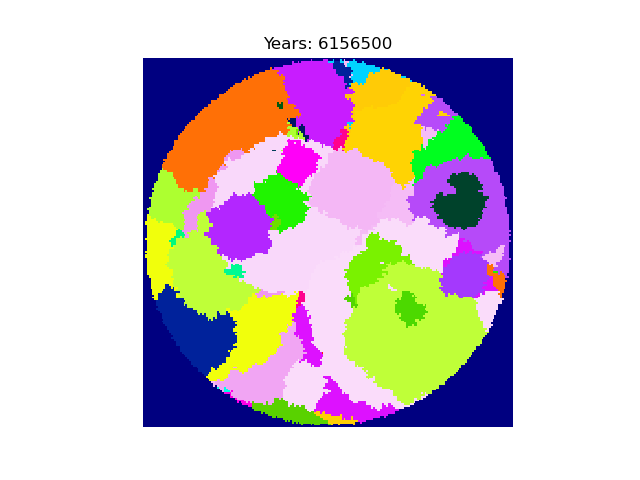

In [10]:
n = 1
rows = 1
cols = 1
fig, ax = plt.subplots(rows,cols) 
if (n != 1):
    axflat = ax.flatten()

# 1000x1000 is about what I can easily deal with. So each bit represents an area 100x100 light years big. So typically
# contains about 1500 star systems!
nx, ny = (1000, 1000)
nx, ny = (200, 200)

x = np.round(np.linspace(0, nx, nx+1))
y = np.round(np.linspace(0, ny, ny+1))
z = np.floor(2*np.random.rand(ny,nx))
z = 0*z 
z[int(3*nx/4),int(3*ny/4)] = 1
zpower = z.copy()


x = np.round(np.linspace(0, nx, nx))
y = np.round(np.linspace(0, ny, ny))
X,Y = np.meshgrid(x,y)
dist = np.sqrt(np.abs(Y - np.max(Y)/2)**2 + np.abs(X - np.max(X)/2)**2)
bc = (dist>(nx/2 -1))

global zn
global znew
global zold
zn = []
znew = []
znpower = []
for i in range(n):
    zn.append(z.copy())
    znpower.append(zpower.copy())
znew = zn.copy()
zold = zn.copy()
    
quads = []
if (n != 1):
    for i in range(n):
        quads.append(axflat[i].pcolormesh(x,y,zn[i],shading='auto', cmap=cm.gist_ncar))
        axflat[i].set_aspect('equal', adjustable='box')
        axflat[i].set_axis_off()
        #axflat[i].set_title('GOL{}'.format(i+1))
else:
    quads.append(ax.pcolormesh(x,y,zn[i],shading='auto', cmap=cm.gist_ncar)) #cm.Greys
    ax.set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    ax.set_title('Years: 0')

#bug tester
# for i in range(n):  
#     for j in range(200):
#         zn[i] = stepforward(zn[i],code[i])
#     quads[i].set_array(zn[i])
#     quads[i].set_clim(0,1)
#     zn[i][zn[i]<0] = 0
    
        
def animate(frame):
    global zn
    global znew
    global zold
    for i in range(n):
        zn[i],znpower[i] = stepforward(zn[i],znpower[i])
        quads[i].set_array(zn[i])
        #quads[i].set_array(znpower[i])
        quads[i].set_clim(0,1)
        zn[i][zn[i]<0] = 0
        
        #BC (Edge of milky way)
        zn[i][bc] = 0
        znpower[i][bc] = 0
        
        ax.set_title('Years: {}'.format(frame*1500 + 2000))
        
        #difference view
#         znew[i] = stepforward(znew[i],code[i])
#         quads[i].set_array(np.abs(znew[i]-zn[i]))
#         zn[i] = znew[i].copy()
#         quads[i].set_clim(0,1)
#         zn[i][zn[i]<0] = 0

        #two layer difference view
#         znew[i] = stepforward(znew[i],code[i])
#         twolayer = np.abs(znew[i]-zn[i])+np.abs(zn[i]-zold[i])
#         twolayer[twolayer!=0] = 2
#         twolayer[twolayer==0] = 1
#         twolayer[twolayer==2] = 0
#         quads[i].set_array(twolayer)
#         zold[i] = zn[i].copy()
#         zn[i] = znew[i].copy()
#         quads[i].set_clim(0,1)
#         zn[i][zn[i]<0] = 0    

        #null boundary condition
#         zn[i][:,-1] = 0
#         zn[i][:,0] = 0 
#         zn[i][-1,:] = 0
#         zn[i][0,:] = 0
            
    return quads

anim = animation.FuncAnimation(fig,animate,frames=4000000,interval=50,blit=False,repeat=True)
#anim.save('I4280122.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
plt.show()

In [2]:
def stepforward(z,genes): 
    '''
    stepforward: general cellular automata
    
    A cell will add its value to the cells around it.
    '''
    zalive = z.copy()
    zalive[zalive > genes[19]] = 1
    zalive[zalive <= genes[19]] = 0
    uza = np.roll(zalive, 1, 0) #neighbour above
    dza = np.roll(zalive, -1, 0) #neighbour below
    rza = np.roll(zalive, -1, 1) #neighbour on right
    lza = np.roll(zalive, 1, 1) #neighbour on left
    urza = np.roll(uza, -1, 1) #up and right
    ulza = np.roll(uza, 1, 1) #up and left
    drza = np.roll(dza, -1, 1) #down and right
    dlza = np.roll(dza, 1, 1) #down and left
    nbrs = uza + dza + rza + lza + urza + ulza + drza + dlza
    
    alive = (zalive==1)
    dead = (zalive==0)
    nbrs0 = (nbrs == 0)
    nbrs1 = (nbrs == 1)
    nbrs2 = (nbrs == 2)
    nbrs3 = (nbrs == 3)
    nbrs4 = (nbrs == 4)
    nbrs5 = (nbrs == 5)
    nbrs6 = (nbrs == 6)
    nbrs7 = (nbrs == 7)
    nbrs8 = (nbrs == 8)
    
    # death
    z[np.logical_and((z>0),dead)] -= genes[20] 
    z[alive] -= genes[0]
    z[np.logical_and(nbrs0,alive)] -= genes[1]
    z[np.logical_and(nbrs1,alive)] -= genes[2]
    z[np.logical_and(nbrs2,alive)] -= genes[3]
    z[np.logical_and(nbrs3,alive)] -= genes[4]
    z[np.logical_and(nbrs4,alive)] -= genes[5]
    z[np.logical_and(nbrs5,alive)] -= genes[6]
    z[np.logical_and(nbrs6,alive)] -= genes[7]
    z[np.logical_and(nbrs7,alive)] -= genes[8]
    z[np.logical_and(nbrs8,alive)] -= genes[9]
    
    # life
    rand = np.random.rand(np.shape(z)[0],np.shape(z)[1]) # should be 9 different numbers?
    OpenCells = (z<=genes[21])
    z[np.logical_and(np.logical_and(np.logical_and(nbrs0,dead),(rand<genes[10])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs1,dead),(rand<genes[11])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs2,dead),(rand<genes[12])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs3,dead),(rand<genes[13])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs4,dead),(rand<genes[14])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs5,dead),(rand<genes[15])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs6,dead),(rand<genes[16])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs7,dead),(rand<genes[17])),OpenCells)] = 1
    z[np.logical_and(np.logical_and(np.logical_and(nbrs8,dead),(rand<genes[18])),OpenCells)] = 1
    
    
    return z

In [4]:
x = "0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.9"
x = [float(i) for i in x.split()]
code = [x]

<IPython.core.display.Javascript object>


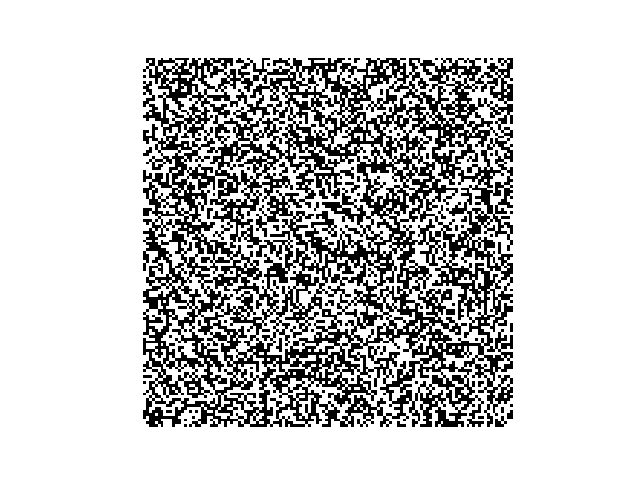

In [7]:
n = 1
rows = 1
cols = 1
fig, ax = plt.subplots(rows,cols) 
if (n != 1):
    axflat = ax.flatten()

nx, ny = (128, 128)

x = np.round(np.linspace(0, nx, nx+1))
y = np.round(np.linspace(0, ny, ny+1))
z = np.floor(2*np.random.rand(ny,nx))


global zn
global znew
global zold
zn = []
znew = []
for i in range(n):
    zn.append(z.copy())
znew = zn.copy()
zold = zn.copy()
    
quads = []
if (n != 1):
    for i in range(n):
        quads.append(axflat[i].pcolormesh(x,y,zn[i],shading='auto', cmap=cm.gray))
        axflat[i].set_aspect('equal', adjustable='box')
        axflat[i].set_axis_off()
        #axflat[i].set_title('GOL{}'.format(i+1))
else:
    quads.append(ax.pcolormesh(x,y,zn[i],shading='auto', cmap=cm.gray))
    ax.set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    #ax.set_title('GOL{}'.format(i+1))

#bug tester
# for i in range(n):  
#     for j in range(200):
#         zn[i] = stepforward(zn[i],code[i])
#     quads[i].set_array(zn[i])
#     quads[i].set_clim(0,1)
#     zn[i][zn[i]<0] = 0
    
        
def animate(frame):
    global zn
    global znew
    global zold
    for i in range(n):
        zn[i] = stepforward(zn[i],code[i])
        quads[i].set_array(zn[i])
        quads[i].set_clim(0,1)
        zn[i][zn[i]<0] = 0
        
        #difference view
#         znew[i] = stepforward(znew[i],code[i])
#         quads[i].set_array(np.abs(znew[i]-zn[i]))
#         zn[i] = znew[i].copy()
#         quads[i].set_clim(0,1)
#         zn[i][zn[i]<0] = 0

        #two layer difference view
#         znew[i] = stepforward(znew[i],code[i])
#         twolayer = np.abs(znew[i]-zn[i])+np.abs(zn[i]-zold[i])
#         twolayer[twolayer!=0] = 2
#         twolayer[twolayer==0] = 1
#         twolayer[twolayer==2] = 0
#         quads[i].set_array(twolayer)
#         zold[i] = zn[i].copy()
#         zn[i] = znew[i].copy()
#         quads[i].set_clim(0,1)
#         zn[i][zn[i]<0] = 0    

        #null boundary condition
#         zn[i][:,-1] = 0
#         zn[i][:,0] = 0 
#         zn[i][-1,:] = 0
#         zn[i][0,:] = 0
            
    return quads

anim = animation.FuncAnimation(fig,animate,frames=400,interval=50,blit=False,repeat=True)
#anim.save('I4280122.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
plt.show()